In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd
from mordred import Calculator, descriptors
#import wget
#import unzip
#import padelpy

In [3]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('data/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [4]:
Y = sol.iloc[:,1]
Y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [5]:
#descriptor
molecules = sol.SMILES.apply(Chem.MolFromSmiles)

In [6]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [7]:
mordred_descriptors = All_Mordred_descriptors(sol['SMILES'])

100%|██████████| 8438/8438 [03:53<00:00, 36.12it/s]


In [8]:
mordred_descriptors.shape

(8438, 1613)

In [9]:
X=mordred_descriptors 

In [10]:
#X.to_excel(r'D:/python/rdkit/experiments.xlsx', index = False)

In [12]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

In [13]:
des_num = X.select_dtypes(include='number')
des_num.shape

(8438, 809)

In [14]:
transformed = vt.fit_transform(des_num)

In [15]:
_ = vt.fit(des_num)
mask = vt.get_support()

In [16]:
des_num = des_num.loc[:, mask]

In [17]:
vt = VarianceThreshold(threshold=0.1)

# Fit
_ = vt.fit(des_num)

# Get the boolean mask
mask = vt.get_support()

des_reduced = des_num.loc[:, mask]
H=des_reduced
#X=H.drop(['FilterItLogS', 'SLogP'], axis=1)
X=H
X.shape

(8438, 504)

In [18]:
correlated_features = set()
correlation_matrix=X.corr()

In [19]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
len(correlated_features)

326

In [21]:
print(correlated_features)

{'SssCH2', 'AATSC1i', 'Xp-1dv', 'IC5', 'EState_VSA9', 'MWC10', 'Xp-4d', 'Zagreb2', 'ATS7se', 'MPC5', 'piPC5', 'Xp-3d', 'MWC08', 'ATSC2are', 'MIC2', 'C2SP2', 'ATS8p', 'ATS1se', 'ATSC6are', 'ATS5m', 'SaaNH', 'ATS5Z', 'ATS4p', 'ATSC1m', 'ATS6are', 'IC2', 'MPC8', 'MPC2', 'ATSC0v', 'MPC9', 'ATS4i', 'nBonds', 'AATS1d', 'ATS0d', 'SsOH', 'SaaN', 'ATS7are', 'SsNH2', 'ATS4pe', 'SsBr', 'AMW', 'SaasN', 'ZMIC3', 'MIC4', 'ZMIC0', 'CIC5', 'nH', 'ATS7dv', 'TIC4', 'mZagreb2', 'ATS5dv', 'VSA_EState5', 'ATSC3pe', 'fragCpx', 'ATS6dv', 'ATS5p', 'ATSC8se', 'AATS0are', 'Zagreb1', 'AATS0Z', 'Sp', 'SRW06', 'ATS0pe', 'ATS6p', 'ATS1d', 'ATS3m', 'MWC06', 'IC3', 'Mm', 'ATS3se', 'ATS6i', 'Sse', 'ATS4se', 'ATSC0d', 'ATS5are', 'piPC2', 'Radius', 'SlogP_VSA5', 'n6aHRing', 'piPC10', 'AATS1v', 'piPC4', 'ATS2pe', 'Xp-7dv', 'Xpc-6d', 'ATS0v', 'ATS7Z', 'SdO', 'bpol', 'MWC03', 'ATSC0dv', 'AATSC1m', 'ATSC7pe', 'MWC07', 'ATSC3m', 'BertzCT', 'ATS2i', 'SaaaC', 'MWC04', 'ATSC1pe', 'nBondsA', 'ATS7d', 'ATSC0are', 'nBondsKS', 'MPC

In [22]:
X.drop(labels=correlated_features, axis=1, inplace=True)

C:\Users\Matsunami\AppData\Local\Temp\ipykernel_11836\1003493426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=correlated_features, axis=1, inplace=True)


In [23]:
X.drop('FilterItLogS', axis=1, inplace=True)

C:\Users\Matsunami\AppData\Local\Temp\ipykernel_11836\4124452189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('FilterItLogS', axis=1, inplace=True)


In [24]:
X.shape

(8438, 177)

In [25]:
X.head()

,nAcid,nBase,nAromAtom,nAtom,nHeavyAtom,nBridgehead,nHetero,nC,nN,nO,...,n5aRing,naHRing,nARing,n5ARing,n6ARing,nAHRing,nFRing,nRot,Diameter,WPath
0,0,0,0,45,23,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
1,0,0,0,45,23,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
2,0,0,0,45,23,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
3,0,1,6,31,15,2,3,12,2,1,...,0,1,2,0,2,2,1,0,7,322
4,0,1,6,31,15,2,3,12,2,1,...,0,1,2,0,2,2,1,0,7,322


In [26]:
gf=set()

In [27]:
i=0
for i in range(len(X.columns)):
   
    colname = X.columns[i]
    gf.add(colname)

In [28]:
gf


{'AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'Nddss

In [30]:
#X.to_excel(r'D:/python/rdkit/file name descriptor 8000data.xlsx', index = False)

In [31]:
y = sol.iloc[:,1]
y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [55]:
Y = sol.iloc[:,1]
Y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [56]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [58]:
#predicts the X_train
Y_pred_train = reg.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.82
Coefficient of determination (R^2): 0.80


In [59]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.6179949880836845
RMSE (filtered test): 0.8207063925090446
R^2 (filtered test): 0.8036719665004075


In [60]:
#predicts the X_test
Y_pred_test = reg.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.83
Coefficient of determination (R^2): 0.81


In [61]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.6234102045418634
RMSE (filtered test): 0.8262216647693711
R^2 (filtered test): 0.806703310268871


In [62]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6750, 177) (1688, 177) (6750,) (1688,)


In [63]:
yhat = reg.predict(X_test)

C:\Users\Matsunami\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)

In [65]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]
print(X_test.shape, Y_test.shape)
# fit the model

(1536, 177) (1536,)


In [67]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [68]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]
print(X_train.shape, Y_train.shape)

(6515, 177) (6515,)


In [69]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
# evaluate the model
Y_test_pred2 = reg.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.605


In [70]:
Y_test.shape, Y_test_pred2.shape

((1536,), (1536,))

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8003566985574172
R^2 (filtered): 0.8126845948140663


In [72]:
Y_train_pred2 = reg.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.605


In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8052933833382417
R^2 (filtered): 0.8077896211635142


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8003566985574172
R^2 (filtered): 0.8126845948140663


In [76]:
Y_train.shape,Y_train_pred2.shape

((6515,), (6515,))

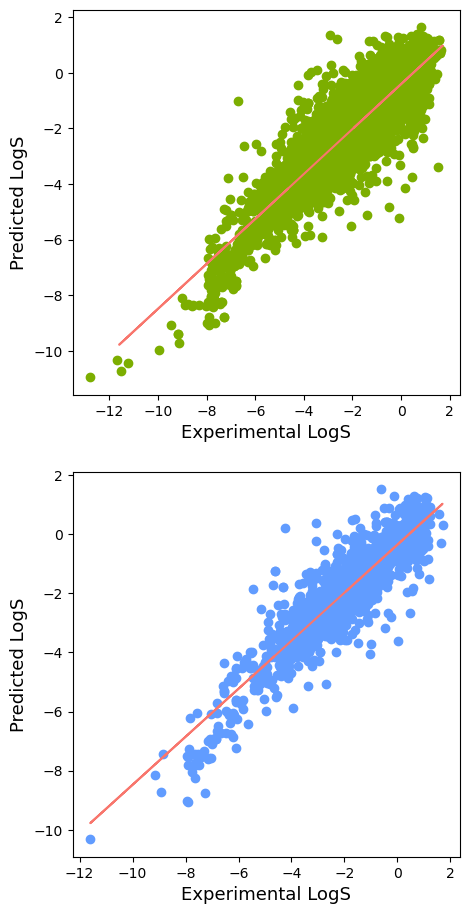

In [77]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_train_pred2, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)



# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(Y_test, Y_test_pred2, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_test_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [78]:
#reg = LinearRegression()
#reg.fit(X, y)
i=0

for i in range(len(X.columns)):
# Print out the coefficients for each fingerprint

    print(X.columns[i], ":", reg.coef_[i])

nAcid : -0.4030232091515322
nBase : 0.15067554694327626
nAromAtom : 0.19185502746907007
nAtom : -0.17475965712264263
nHeavyAtom : -0.6604242139831106
nBridgehead : 0.1135989392692793
nHetero : -1.4026083993767433
nC : -0.48628211030807356
nN : 0.8711514924490164
nO : 1.1058689041924004
nS : -2.567374079806562
nF : 36.57327233416018
nCl : 34.689544058661205
nBr : 21.47687647454596
nX : -37.42191197576439
ATS0Z : 0.013526610471334355
AATS0dv : 0.002831746957366661
AATS0d : 0.01417468344233308
AATS0i : -0.005401951433952687
ATSC1dv : 0.024623050552045167
ATSC2dv : -0.007279678852217808
ATSC3dv : -0.003709639348146776
ATSC4dv : -0.0025986880404681723
ATSC5dv : -0.00012343796096169618
ATSC6dv : -0.005092879492455314
ATSC7dv : 0.0005159771416159975
ATSC8dv : 0.00010737007171821022
ATSC1d : -0.04496995152266056
ATSC2d : 0.05581734420492754
ATSC3d : 0.005478423300608725
ATSC4d : 0.007195423718729965
ATSC5d : 0.011951830539736794
ATSC6d : 0.002552061502195479
ATSC7d : -0.005884807821414064
ATSC

In [79]:
i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Print the sorted coefficients
for coefficient in coefficients_sorted:
    print(coefficient[0], ":", coefficient[1])


nF : 36.57327233416018
nCl : 34.689544058661205
nBr : 21.47687647454596
nO : 1.1058689041924004
ATSC1se : 0.9501830783953891
nN : 0.8711514924490164
GATS1p : 0.5723545066582244
NssssC : 0.559685589629834
NsssCH : 0.5086487501993954
NssCH2 : 0.4988130086601575
Xc-5d : 0.4946939928749732
NsNH2 : 0.4911791280458069
NaasN : 0.4037865231972737
NssNH : 0.375766131410833
NsOH : 0.3683843889179319
NsCH3 : 0.35383175785102705
n6HRing : 0.32776478970397344
BalabanJ : 0.31229974747719524
n5HRing : 0.3011893343630908
NdsCH : 0.218804981741992
nAromAtom : 0.19185502746907007
naHRing : 0.19006552246891403
IC1 : 0.18621703940585865
NdssC : 0.16704511931441324
ATSC6se : 0.1614131973814976
nBase : 0.15067554694327626
nBridgehead : 0.1135989392692793
SdsN : 0.1069097082534822
VSA_EState1 : 0.09886033994438487
SsSH : 0.09648595344270065
SdsssP : 0.09310628559930419
SdCH2 : 0.09230462764967524
VSA_EState9 : 0.09024863908210498
ATSC3se : 0.08995880187018192
SssS : 0.07501576393450704
StN : 0.07233872040635

In [80]:
import pandas as pd

i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Extract the column names and coefficients from the sorted list
column_names = [coefficient[0] for coefficient in coefficients_sorted]
coefficients_values = [coefficient[1] for coefficient in coefficients_sorted]

# Create a data frame with column names and coefficients
data = {'Column': column_names, 'Coefficient': coefficients_values}
df = pd.DataFrame(data)

# Save the data frame to an Excel file
df.to_excel('coefficients_data.xlsx', index=False)

# Print the sorted coefficients
for coefficient in coefficients_sorted:
    print(coefficient[0], ":", coefficient[1])


nF : 36.57327233416018
nCl : 34.689544058661205
nBr : 21.47687647454596
nO : 1.1058689041924004
ATSC1se : 0.9501830783953891
nN : 0.8711514924490164
GATS1p : 0.5723545066582244
NssssC : 0.559685589629834
NsssCH : 0.5086487501993954
NssCH2 : 0.4988130086601575
Xc-5d : 0.4946939928749732
NsNH2 : 0.4911791280458069
NaasN : 0.4037865231972737
NssNH : 0.375766131410833
NsOH : 0.3683843889179319
NsCH3 : 0.35383175785102705
n6HRing : 0.32776478970397344
BalabanJ : 0.31229974747719524
n5HRing : 0.3011893343630908
NdsCH : 0.218804981741992
nAromAtom : 0.19185502746907007
naHRing : 0.19006552246891403
IC1 : 0.18621703940585865
NdssC : 0.16704511931441324
ATSC6se : 0.1614131973814976
nBase : 0.15067554694327626
nBridgehead : 0.1135989392692793
SdsN : 0.1069097082534822
VSA_EState1 : 0.09886033994438487
SsSH : 0.09648595344270065
SdsssP : 0.09310628559930419
SdCH2 : 0.09230462764967524
VSA_EState9 : 0.09024863908210498
ATSC3se : 0.08995880187018192
SssS : 0.07501576393450704
StN : 0.07233872040635

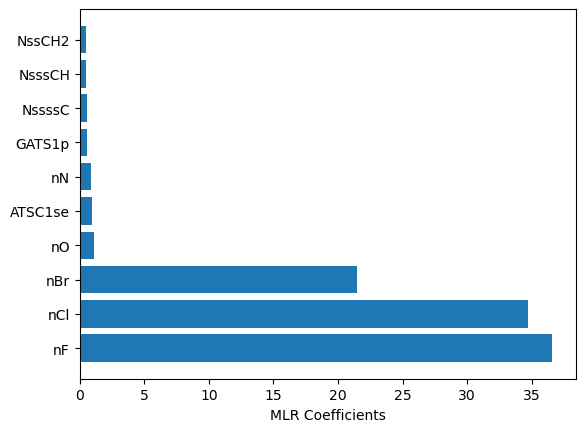

In [81]:
import matplotlib.pyplot as plt

i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Select only the top ten coefficients
top_ten_coefficients = coefficients_sorted[:10]

# Extract the column names and coefficients from the top ten coefficients
column_names = [coefficient[0] for coefficient in top_ten_coefficients]
coefficients_values = [coefficient[1] for coefficient in top_ten_coefficients]

# Create a bar chart
plt.barh(range(len(column_names)), coefficients_values, align='center')
plt.yticks(range(len(column_names)), column_names)
plt.xlabel('MLR Coefficients')
#plt.ylabel('Column')
#plt.title('Top Ten Coefficients Comparison')

plt.savefig('coefficients_chart.png', dpi=1200)

# Display the bar chart
plt.show()


In [82]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [83]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))



Mean squared error (RMSE): 0.25
Coefficient of determination (R^2): 0.98


In [84]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.16417014958085777
RMSE (filtered test): 0.2518700506359756
R^2 (filtered test): 0.9811972387251107


In [85]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.63
Coefficient of determination (R^2): 0.88


In [86]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.4068673631435709
RMSE (filtered test): 0.6271645879242033
R^2 (filtered test): 0.8849810536652529


In [87]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.4068673631435709

In [88]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6515, 177) (1536, 177) (6515,) (1536,)


In [89]:
yhat = model.predict(X_test)
# evaluate predictions
#mae = mean_absolute_error(Y_test, yhat)
#print('MAE: %.3f' % mae)

In [90]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)

In [91]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]


In [92]:
print(X_test.shape, Y_test.shape)

(1510, 177) (1510,)


In [93]:
# fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
# evaluate the model
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.409


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.6306177817840258
R^2 (filtered): 0.8825100102940717


In [95]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [96]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]


In [97]:
print(X_train.shape, Y_train.shape)

(6488, 177) (6488,)


In [98]:
# fit the model
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(X_train, Y_train)
# evaluate the model
Y_train_pred2 = model.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.164


In [99]:
#Y_train_pred2 = model.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)
mae = mean_absolute_error(Y_train, Y_train_pred2)

print('MAE: %.3f' % mae)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

MAE: 0.164
RMSE (filtered): 0.251837701852032
R^2 (filtered): 0.9812220678027356


In [100]:
#Y_test_pred2 = model.predict(X_test)
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.6306177817840258
R^2 (filtered): 0.8825100102940717


In [101]:
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.409


In [102]:
outlier_indices = np.where(mask == False)[0]

print(outlier_indices)

[  73  263  292 1088 1273 1516 1525 1802 3057 3182 3234 3317 3644 3725
 3737 4060 4278 4401 4662 4727 5286 5742 5782 5793 5947 6278 6465]


In [103]:
outlier_features = sol.iloc[outlier_indices]
outlier_features

,SMILES,measured log(solubility:mol/L)
73,NCC(=O)NCC(=O)NC1=CC=C(C=C1)S(=O)(=O)NC1=NN=C(...,-1.29
263,N(N=Nc1ccccc1)c2ccccc2,-2.60
292,CN1C(=O)NC(=O)[C@@](C)(C1=O)C1=CCCCC1,-2.74
1088,CN1C2=C(C=CC=C2)C(C(N)=O)=C1C(N)=O,-1.82
1273,Cc1ccc(O)c(c1)C(C)(C)C,-2.69
1516,Cc1ccc(cc1)C(C)(C)C,-4.47
1525,ClC1=CC=CC(C2=CNC=C2C#N)=C1Cl,-4.88
1802,CCOC(=O)CCCCC(=O)OCC,-1.68
3057,CC1=CC2=C(C=C1)S(=O)(=O)C=C2,-2.65
3182,S=C(SN1CCOCC1)N2CCOCC2,-3.29


In [104]:
outlier_features.to_csv('output/sorted_residuals.csv', index=False)

In [57]:
testdata_outlier = pd.read_csv('D:/python/rdkit/outlier_Ds.csv')
testdata_outlier

,SMILES,measured log(solubility:mol/L)
0,OCC1OC(OCC(O)C(O)C(O)C(O)C=O)C(O)C(O)C1O,0.47
1,CCOP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OCC,0.30
2,OC(=O)CC1(O)CC(=O)N(C1=O)C1=CC=CC=C1,-0.68
3,CN(C)C(=O)CCOC(=O)C1=CC=CC=C1,-1.10
4,CN1N(C(=O)C(NC(N)=O)=C1C)C1=CC=CC=C1,-1.52
...,...,...
230,N[C@H](CO)C(O)=O,0.54
231,OC(=O)C(Cl)=C(Br)Br,-0.69
232,OC(=O)C(F)(F)C(F)F,-0.88
233,BrCC#C,-0.90


In [58]:
mordred_descriptors3 = All_Mordred_descriptors(testdata_outlier['SMILES'])

100%|████████████████████████████████████████████████████████████████████████████████| 235/235 [00:06<00:00, 33.99it/s]


In [62]:
Outlier_d=mordred_descriptors3[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing'

]]
Outlier_d.shape


(235, 177)

In [63]:
Outlier_d.to_excel(r'D:/python/rdkit/file name descriptor 32data.xlsx', index = False)

In [64]:
testdata_outlier2 = pd.read_csv('D:/python/rdkit/dataset_without_outliers_Dc.csv')
testdata_outlier2

,SMILES,measured log(solubility:mol/L)
0,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,0.79
1,O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...,0.79
2,OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...,0.79
3,CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2,0.65
4,CN1CC2CC(C1)C1=CC=CC(=O)N1C2,0.65
...,...,...
8168,O=[N+]([O-])C,0.26
8169,OC,1.57
8170,S=C(N)N,0.32
8171,O=C(NO)N,1.12


In [65]:
mordred_descriptors4 = All_Mordred_descriptors(testdata_outlier2['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████| 8173/8173 [04:46<00:00, 28.52it/s]


In [66]:
Outlier_d2=mordred_descriptors4[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing'

]]
Outlier_d2.shape


(8173, 177)

In [68]:
Outlier_d2.to_excel(r'D:/python/rdkit/177 descriptors for dataset without outliers.xlsx', index = False)

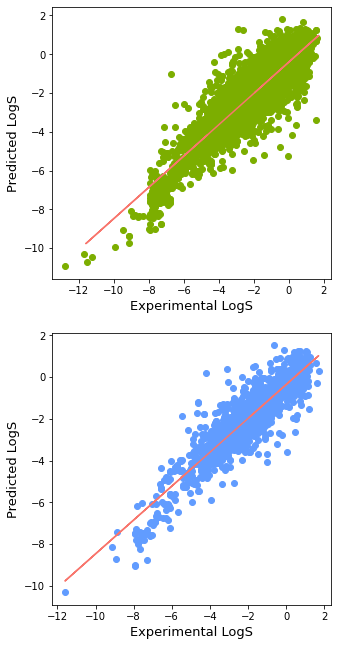

In [43]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_train_pred2, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_test_pred2, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_test_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [87]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [93]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X2)

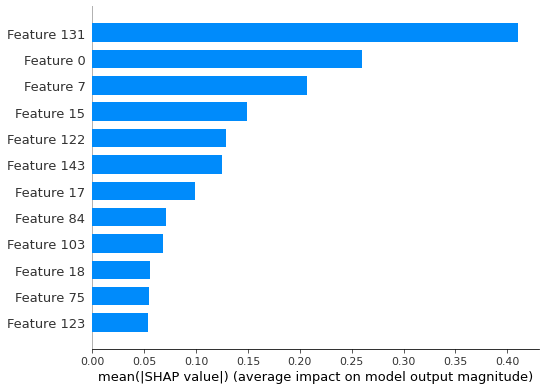

In [105]:
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

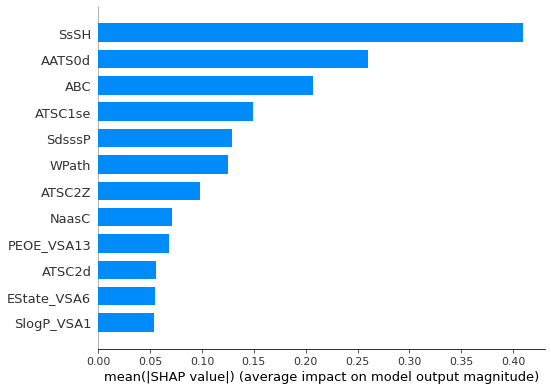

In [112]:
import matplotlib.pyplot as plt

# Assuming you have a list of feature names named 'feature_names'
feature_names = ['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']  # Update with your actual feature names

# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, max_display=12, plot_type="bar", feature_names=feature_names, show=False)

# Save the plot to a PDF file with tight bounding box and high DPI
plt.savefig('scratcch.pdf', bbox_inches='tight', dpi=1000)


In [82]:
#Blind test
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload3raw.csv')
testdata

,Substance,SMILES
0,hexobarbital,CN1C(=O)NC(=O)C(C)(C1=O)C1=CCCCC1
1,nalidixic_acid,CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O
2,phenantroline,c12c(ccc3cccnc13)cccn2
3,phenobarbital,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O
4,sulfamethazine,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1
5,bromogramine,Brc1cc2c(CN(C)C)c[nH]c2cc1
6,phenazopyridine,c1ccc(cc1)\N=N\c1c(nc(cc1)N)N
7,amantadine,C1C2CC3CC(CC1C3)(N)C2
8,benzylimidazole,n1(Cc2ccccc2)cncc1
9,chlorpropamide,Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1


In [83]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [84]:
mordred_descriptors2 = All_Mordred_descriptors(testdata['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.64it/s]


In [85]:
Xnew=mordred_descriptors2[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']]
Xnew.shape


(32, 177)

In [66]:
Xnew.to_excel(r'D:/python/rdkit/file name descriptor 32data.xlsx', index = False)

In [86]:
model.fit(X_train, Y_train)
# Predict the target variable for the test data
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([-1.775035  , -1.74710833, -2.13763074, -2.14613333, -1.97639521,
       -1.845475  , -2.19966111, -1.91222933, -1.58789583, -1.86857292,
       -1.81561667, -2.39336111, -1.80413333, -2.167335  , -1.52069667,
       -1.92757279, -2.16275729, -1.77906667, -1.83060798, -2.08420833,
       -1.83011667, -1.82729896, -1.81257205, -1.76492333, -2.43303076,
       -2.09171658, -1.29601   , -1.79385833, -1.97186667, -1.924025  ,
       -1.87687708, -1.97978333])

In [131]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('dataggg.csv', data, delimiter=',')

In [166]:
#Solubility Challenge
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
testdata

,name,SMILES
0,Acebutolol,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1
1,Amoxicillin,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...
2,Bendroflumethiazide,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...
3,Benzocaine,NC1=CC=C(C(OCC)=O)C=C1
4,Benzthiazide,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...
5,2-chloromandelic_acid,OC(C(O)C1=CC=CC=C1Cl)=O
6,Clozapine,ClC(C=C1)=CC2=C1NC(C=CC=C3)=C3C(N4CCN(C)CC4)=N2
7,Dibucaine,CCN(CC)CCNC(C1=C(C=CC=C2)C2=NC(OCCCC)=C1)=O
8,Diethylstilbestrol,CC/C(C1=CC=C(O)C=C1)=C(C2=CC=C(O)C=C2)/CC
9,Diflunisal,FC(C=C1F)=CC=C1C2=CC=C(O)C(C(O)=O)=C2


In [167]:
mordred_descriptors3 = All_Mordred_descriptors(testdata['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.38it/s]


In [168]:
X2new=mordred_descriptors3[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']]
X2new.shape


(32, 177)

In [169]:

y2new = model.predict(X2new)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
y2new

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([-2.1850703 , -2.63400833, -1.93036372, -1.78398611, -1.76584548,
       -1.42595   , -1.97933611, -2.16664861, -2.24985574, -1.74819631,
       -1.59275833, -1.79854444, -2.24578074, -1.59423131, -1.61559807,
       -1.773215  , -2.13283908, -2.20449   , -2.0195    , -2.05081697,
       -2.04561083, -1.74164167, -1.79854444, -1.9718375 , -2.12021669,
       -1.57074167, -1.87762021, -1.94107792, -2.10046667, -2.16647519,
       -1.88656875, -1.73295833])

In [84]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(y2new)
# save to csv file
savetxt('datachallenge.csv', data, delimiter=',')